In [74]:
from google.colab import files
files.upload()


Saving 466 Bonddata.xlsx to 466 Bonddata (2).xlsx


{'466 Bonddata (2).xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00!\x8cF:s\x01\x00\x00\x8c\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [75]:
import os, pandas as pd

print(os.listdir())

FILE = [f for f in os.listdir() if f.endswith(".xlsx")][0]  # 当前目录里第一个xlsx
print("Using FILE =", FILE)

xls = pd.ExcelFile(FILE)
print("Sheets:", xls.sheet_names)


['.config', 'ytm_curves.png', '466 data (2).xlsx', '466 data.xlsx', '466 Bonddata (2).xlsx', '466 Bonddata (1).xlsx', '466 data.csv', '466 data (1).xlsx', '466 Bonddata.xlsx', '466 data (3).xlsx', 'sample_data']
Using FILE = 466 data (2).xlsx
Sheets: ['BondInfo', 'Close']


In [76]:
info = pd.read_excel(FILE, sheet_name="BondInfo")
close_wide = pd.read_excel(FILE, sheet_name="Close")

print("info shape:", info.shape)
print("close_wide shape:", close_wide.shape)

display(info.head())
display(close_wide.head())


info shape: (10, 6)
close_wide shape: (14, 11)


,Unnamed: 0,Bond Name,ISIN,Coupon,Issue Date,Maturity Date
0,NaN,CANADA 23/26,CA135087R226,0.0450,2023-11-01,2026-02-01
1,NaN,CANADA 24/26,CA135087R556,0.0400,2024-02-12,2026-05-01
2,NaN,CANADA 24/26,CA135087S398,0.0325,2024-08-02,2026-11-01
3,NaN,CANADA 24/27,CA135087S547,0.0300,2024-11-01,2027-02-01
4,NaN,CANADA 25/27,CA135087S885,0.0275,2025-02-20,2027-05-01


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,Close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,CA135087R226,CA135087R556,CA135087S398,CA135087S547,CA135087S885,CA135087Q988,CA135087J397,CA135087R895,CA135087S471,CA135087P329
2,2026-01-05 00:00:00,100.14,100.49,100.69,100.545,100.325,103.63,98.27,102.22,99.493,95.528
3,2026-01-06 00:00:00,100.13,100.49,100.69,100.56,100.323,103.7,98.38,102.33,99.423,95.75
4,2026-01-07 00:00:00,100.13,100.49,100.7,100.57,100.36,103.71,98.42,102.37,99.563,95.895


In [77]:
import numpy as np

info = info.copy()
info.columns = [c.strip() for c in info.columns]

info["ISIN"] = info["ISIN"].astype(str).str.strip()

info["Issue Date"] = pd.to_datetime(info["Issue Date"], errors="coerce")
info["Maturity Date"] = pd.to_datetime(info["Maturity Date"], errors="coerce")

c = info["Coupon"].astype(str).str.replace("%", "", regex=False)
info["Coupon"] = pd.to_numeric(c, errors="coerce")
info.loc[info["Coupon"] > 1, "Coupon"] = info.loc[info["Coupon"] > 1, "Coupon"] / 100

info.head()


,Unnamed: 0,Bond Name,ISIN,Coupon,Issue Date,Maturity Date
0,NaN,CANADA 23/26,CA135087R226,0.0450,2023-11-01,2026-02-01
1,NaN,CANADA 24/26,CA135087R556,0.0400,2024-02-12,2026-05-01
2,NaN,CANADA 24/26,CA135087S398,0.0325,2024-08-02,2026-11-01
3,NaN,CANADA 24/27,CA135087S547,0.0300,2024-11-01,2027-02-01
4,NaN,CANADA 25/27,CA135087S885,0.0275,2025-02-20,2027-05-01


In [78]:
close_wide = pd.read_excel(FILE, sheet_name="Close", header=2)
print(list(close_wide.columns)[:5])
close_wide.head()


['Date', 'CA135087R226', 'CA135087R556', 'CA135087S398', 'CA135087S547']


,Date,CA135087R226,CA135087R556,CA135087S398,CA135087S547,CA135087S885,CA135087Q988,CA135087J397,CA135087R895,CA135087S471,CA135087P329
0,2026-01-05,100.14,100.49,100.69,100.545,100.325,103.63,98.27,102.22,99.493,95.528
1,2026-01-06,100.13,100.49,100.69,100.560,100.323,103.70,98.38,102.33,99.423,95.750
2,2026-01-07,100.13,100.49,100.70,100.570,100.360,103.71,98.42,102.37,99.563,95.895
3,2026-01-08,100.12,100.49,100.69,100.560,100.350,103.74,98.39,102.34,99.498,95.910
4,2026-01-09,100.11,100.49,100.69,100.560,100.368,103.73,98.37,102.31,99.580,95.870


In [79]:
import pandas as pd

close_wide = close_wide.copy()
close_wide.columns = [str(c).strip() for c in close_wide.columns]
close_wide["Date"] = pd.to_datetime(close_wide["Date"], errors="coerce")

for col in close_wide.columns[1:]:
    close_wide[col] = pd.to_numeric(close_wide[col], errors="coerce")

price_cols = [c for c in close_wide.columns if c != "Date"]

close_long = close_wide.melt(
    id_vars=["Date"],
    value_vars=price_cols,
    var_name="ISIN",
    value_name="Close"
)
close_long["ISIN"] = close_long["ISIN"].astype(str).str.strip()
close_long = close_long.dropna(subset=["Date", "ISIN", "Close"])

info["ISIN"] = info["ISIN"].astype(str).str.strip()

data = close_long.merge(info, on="ISIN", how="left")

print("rows:", len(data))
print("dates:", data["Date"].min(), "to", data["Date"].max())
print("bonds:", data["ISIN"].nunique())
print("missing bond info:", data["Maturity Date"].isna().sum())

data.head()


rows: 100
dates: 2026-01-05 00:00:00 to 2026-01-16 00:00:00
bonds: 10
missing bond info: 0


,Date,ISIN,Close,Unnamed: 0,Bond Name,Coupon,Issue Date,Maturity Date
0,2026-01-05,CA135087R226,100.14,NaN,CANADA 23/26,0.045,2023-11-01,2026-02-01
1,2026-01-06,CA135087R226,100.13,NaN,CANADA 23/26,0.045,2023-11-01,2026-02-01
2,2026-01-07,CA135087R226,100.13,NaN,CANADA 23/26,0.045,2023-11-01,2026-02-01
3,2026-01-08,CA135087R226,100.12,NaN,CANADA 23/26,0.045,2023-11-01,2026-02-01
4,2026-01-09,CA135087R226,100.11,NaN,CANADA 23/26,0.045,2023-11-01,2026-02-01


In [80]:
import numpy as np

def ytm_semiannual(price, coupon_rate, settle, maturity, face=100.0):
    """
    price: clean price per 100 face (e.g., 100.14)
    coupon_rate: annual coupon rate in decimal (e.g., 0.045)
    settle, maturity: pandas Timestamp
    returns: annual YTM (decimal), semi-annual comp
    """
    if pd.isna(price) or pd.isna(coupon_rate) or pd.isna(settle) or pd.isna(maturity):
        return np.nan
    if maturity <= settle:
        return np.nan

    m = 2
    c = face * coupon_rate / m

    T = (maturity - settle).days / 365.25
    n = int(np.ceil(T * m))
    if n < 1:
        n = 1

    def pv(y):
        r = y / m
        disc = 1 / (1 + r)
        return sum(c * disc**k for k in range(1, n + 1)) + face * disc**n

    target = price

    lo, hi = -0.99, 1.50
    f_lo = pv(lo) - target
    f_hi = pv(hi) - target
    if np.isnan(f_lo) or np.isnan(f_hi):
        return np.nan

    for _ in range(20):
        if f_lo * f_hi <= 0:
            break
        hi *= 2
        f_hi = pv(hi) - target
    if f_lo * f_hi > 0:
        return np.nan

    for _ in range(80):
        mid = (lo + hi) / 2
        f_mid = pv(mid) - target
        if f_lo * f_mid <= 0:
            hi, f_hi = mid, f_mid
        else:
            lo, f_lo = mid, f_mid
    return (lo + hi) / 2


In [81]:
import pandas as pd

data["YTM"] = data.apply(
    lambda r: ytm_semiannual(r["Close"], r["Coupon"], r["Date"], r["Maturity Date"]),
    axis=1
)

data[["Date","ISIN","Close","Coupon","Maturity Date","YTM"]].head()


,Date,ISIN,Close,Coupon,Maturity Date,YTM
0,2026-01-05,CA135087R226,100.14,0.045,2026-02-01,0.042141
1,2026-01-06,CA135087R226,100.13,0.045,2026-02-01,0.042345
2,2026-01-07,CA135087R226,100.13,0.045,2026-02-01,0.042345
3,2026-01-08,CA135087R226,100.12,0.045,2026-02-01,0.042549
4,2026-01-09,CA135087R226,100.11,0.045,2026-02-01,0.042753


In [82]:
data["TTM"] = (data["Maturity Date"] - data["Date"]).dt.days / 365.25

In [83]:
curve_data = data[(data["TTM"] > 0) & (data["TTM"] <= 5)].copy()

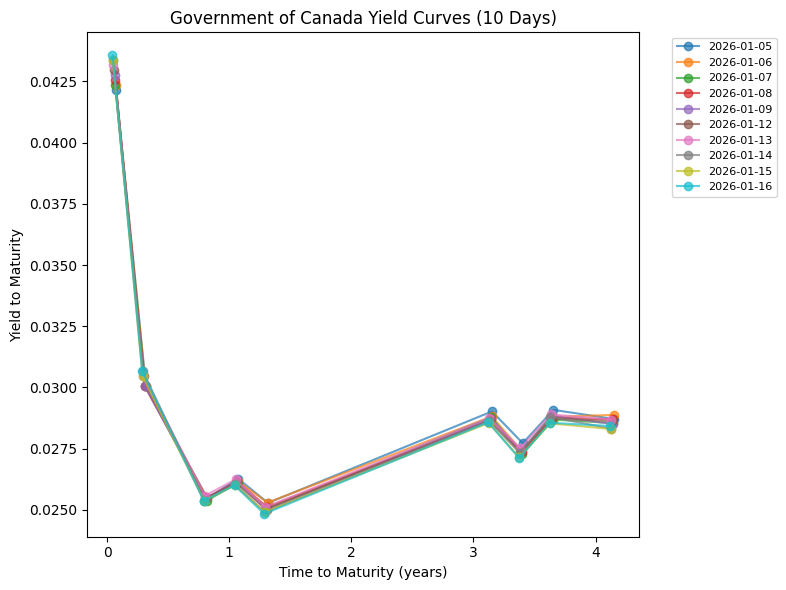

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for d, g in curve_data.groupby("Date"):
    g = g.sort_values("TTM")
    plt.plot(g["TTM"], g["YTM"], marker="o", alpha=0.7, label=d.strftime("%Y-%m-%d"))

plt.xlabel("Time to Maturity (years)")
plt.ylabel("Yield to Maturity")
plt.title("Government of Canada Yield Curves (10 Days)")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()


In [85]:
import numpy as np
import pandas as pd

def cashflow_times_and_amounts(settle, maturity, coupon_rate, face=100.0, freq=2):
    """
    Simplified cash flow schedule:
    - Semi-annual coupon payments
    - Final payment includes principal
    - Time measured in years from settlement date
    """
    T = (maturity - settle).days / 365.25
    if T <= 0:
        return np.array([]), np.array([])

    n = int(np.ceil(T * freq))
    times = np.arange(1, n + 1) / freq

    coupon_payment = face * coupon_rate / freq
    cashflows = np.full(n, coupon_payment)
    cashflows[-1] += face  # add principal at maturity

    return times, cashflows


In [86]:
def bootstrap_spot_curve_for_date(df_day, face=100.0, freq=2):
    """
    Bootstrap spot rates for a single date using bond prices.

    Parameters
    ----------
    df_day : DataFrame
        Data for one trading date only.
        Must contain columns:
        ['Date', 'Close', 'Coupon', 'Maturity Date']

    Returns
    -------
    spot_df : DataFrame
        Columns: ['TTM', 'Spot']
        Spot rates are continuously compounded.
    """
    settle = df_day["Date"].iloc[0]
    instruments = []

    for _, r in df_day.iterrows():
        times, cfs = cashflow_times_and_amounts(
            settle,
            r["Maturity Date"],
            r["Coupon"],
            face=face,
            freq=freq
        )
        if len(times) == 0:
            continue
        instruments.append((times, cfs, float(r["Close"])))

    instruments.sort(key=lambda x: x[0][-1])

    DF = {}
    for times, cfs, price in instruments:
        known_pv = 0.0
        unknown_idx = []
        for i, t in enumerate(times):
            if t in DF:
                known_pv += cfs[i] * DF[t]
            else:
                unknown_idx.append(i)

        if len(unknown_idx) != 1 or unknown_idx[0] != len(times) - 1:
            continue

        j = unknown_idx[0]
        t_last = times[j]
        cf_last = cfs[j]
        DF[t_last] = (price - known_pv) / cf_last
    results = []
    for t in sorted(DF.keys()):
        if DF[t] > 0:
            spot_rate = -np.log(DF[t]) / t
            results.append((t, spot_rate))

    spot_df = pd.DataFrame(results, columns=["TTM", "Spot"])
    return spot_df


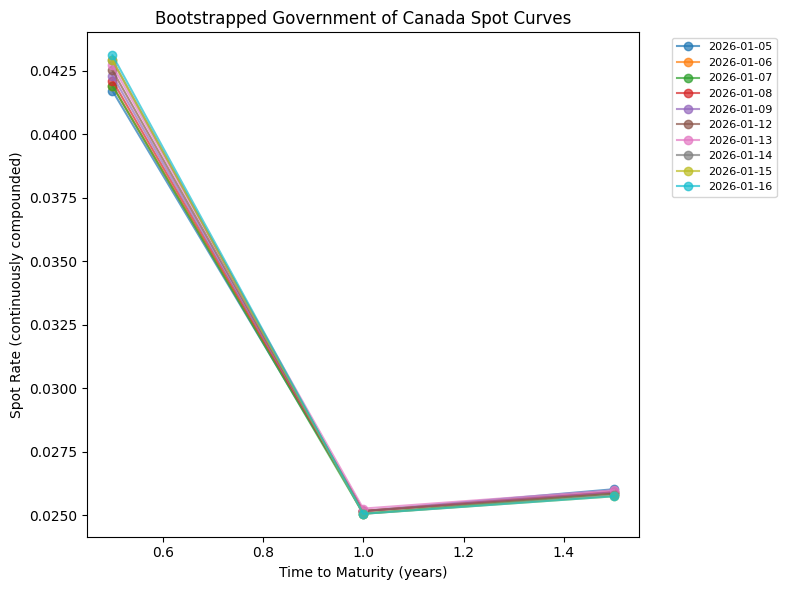

In [87]:
import matplotlib.pyplot as plt

spot_curves = {}

for d, g in data.groupby("Date"):
    g = g.copy()
    spot_df = bootstrap_spot_curve_for_date(g)
    spot_curves[d] = spot_df

plt.figure(figsize=(8, 6))

for d, spot_df in spot_curves.items():
    if spot_df.empty:
        continue
    plt.plot(
        spot_df["TTM"],
        spot_df["Spot"],
        marker="o",
        alpha=0.7,
        label=d.strftime("%Y-%m-%d")
    )

plt.xlabel("Time to Maturity (years)")
plt.ylabel("Spot Rate (continuously compounded)")
plt.title("Bootstrapped Government of Canada Spot Curves")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()


Number of dates with forward curves: 10


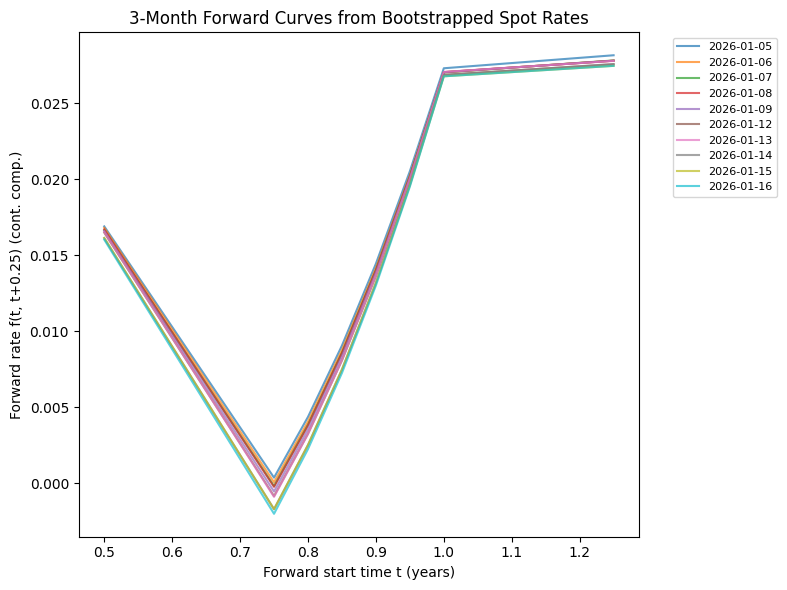

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def make_spot_interpolator(spot_df):
    spot_df = spot_df.sort_values("TTM").dropna()
    t = spot_df["TTM"].values
    r = spot_df["Spot"].values

    def r_of_t(x):
        x = np.asarray(x, dtype=float)
        return np.interp(x, t, r)

    return r_of_t, (t.min(), t.max())

def forward_rate_continuous(r_of_t, t1, t2):
    r1 = r_of_t(t1)
    r2 = r_of_t(t2)
    return (r2 * t2 - r1 * t1) / (t2 - t1)

delta = 0.25
forward_curves = {}

for d, spot_df in spot_curves.items():
    if spot_df.empty or len(spot_df) < 2:
        continue

    r_of_t, (t_min, t_max) = make_spot_interpolator(spot_df)
    t_start = max(delta, t_min)
    t_end = t_max - delta
    if t_end <= t_start:
        continue

    grid = np.arange(t_start, t_end + 1e-9, 0.05)
    fwd = forward_rate_continuous(r_of_t, grid, grid + delta)

    forward_curves[d] = pd.DataFrame({"t": grid, "fwd": fwd})

print("Number of dates with forward curves:", len(forward_curves))

plt.figure(figsize=(8,6))

for d, fwd_df in forward_curves.items():
    plt.plot(fwd_df["t"], fwd_df["fwd"], alpha=0.7, label=d.strftime("%Y-%m-%d"))

plt.xlabel("Forward start time t (years)")
plt.ylabel(f"Forward rate f(t, t+{delta}) (cont. comp.)")
plt.title(f"{int(delta*12)}-Month Forward Curves from Bootstrapped Spot Rates")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()


In [89]:
import pandas as pd
import numpy as np

data = data.copy()
data["Date"] = pd.to_datetime(data["Date"])
ytm_wide = (
    data.pivot_table(index="Date", columns="ISIN", values="YTM", aggfunc="mean")
    .sort_index()
    .reset_index()
)

print("ytm_wide shape:", ytm_wide.shape)
display(ytm_wide.head())


ytm_panel = ytm_wide.copy()
ytm_panel = ytm_panel.sort_values("Date").set_index("Date")

dy = ytm_panel.diff().dropna()
cov_levels = ytm_panel.cov()
cov_changes = dy.cov()

display(cov_levels)
display(cov_changes)
print("cov(levels) shape:", cov_levels.shape)
print("cov(changes) shape:", cov_changes.shape)


ytm_wide shape: (10, 11)


ISIN,Date,CA135087J397,CA135087P329,CA135087Q988,CA135087R226,CA135087R556,CA135087R895,CA135087S398,CA135087S471,CA135087S547,CA135087S885
0,2026-01-05,0.027721,0.032186,0.029018,0.042141,0.030053,0.029081,0.025468,0.028709,0.026271,0.025278
1,2026-01-06,0.027386,0.031821,0.028811,0.042345,0.030053,0.028791,0.025468,0.028877,0.026169,0.025292
2,2026-01-07,0.027264,0.031582,0.028781,0.042345,0.030053,0.028686,0.025367,0.028542,0.026100,0.025040
3,2026-01-08,0.027355,0.031558,0.028692,0.042549,0.030053,0.028765,0.025468,0.028697,0.026169,0.025108
4,2026-01-09,0.027416,0.031623,0.028722,0.042753,0.030053,0.028844,0.025468,0.028501,0.026169,0.024985


ISIN,CA135087J397,CA135087P329,CA135087Q988,CA135087R226,CA135087R556,CA135087R895,CA135087S398,CA135087S471,CA135087S547,CA135087S885
ISIN,,,,,,,,,,
CA135087J397,3.058591e-08,5.542552e-08,2.074687e-08,-5.419444e-08,-2.201032e-08,2.765359e-08,8.333212e-09,1.964494e-08,1.525276e-08,2.051948e-08
CA135087P329,5.542552e-08,1.434718e-07,4.563350e-08,-1.375735e-07,-5.368205e-08,5.333451e-08,1.224744e-08,4.784229e-08,2.833105e-08,4.351515e-08
CA135087Q988,2.074687e-08,4.563350e-08,1.883886e-08,-5.769983e-08,-2.497911e-08,1.869098e-08,4.132524e-09,1.702295e-08,1.102529e-08,1.779571e-08
CA135087R226,-5.419444e-08,-1.375735e-07,-5.769983e-08,2.521841e-07,1.237129e-07,-4.738932e-08,-1.034667e-08,-6.714409e-08,-3.361304e-08,-6.431223e-08
CA135087R556,-2.201032e-08,-5.368205e-08,-2.497911e-08,1.237129e-07,7.077564e-08,-1.900454e-08,-5.463166e-09,-3.083213e-08,-1.637332e-08,-2.859530e-08
CA135087R895,2.765359e-08,5.333451e-08,1.869098e-08,-4.738932e-08,-1.900454e-08,2.571919e-08,7.195265e-09,1.666837e-08,1.356794e-08,1.755805e-08
CA135087S398,8.333212e-09,1.224744e-08,4.132524e-09,-1.034667e-08,-5.463166e-09,7.195265e-09,4.682568e-09,9.082705e-09,5.412708e-09,6.466402e-09
CA135087S471,1.964494e-08,4.784229e-08,1.702295e-08,-6.714409e-08,-3.083213e-08,1.666837e-08,9.082705e-09,3.439997e-08,1.384767e-08,2.583035e-08
CA135087S547,1.525276e-08,2.833105e-08,1.102529e-08,-3.361304e-08,-1.637332e-08,1.356794e-08,5.412708e-09,1.384767e-08,9.045370e-09,1.221599e-08


ISIN,CA135087J397,CA135087P329,CA135087Q988,CA135087R226,CA135087R556,CA135087R895,CA135087S398,CA135087S471,CA135087S547,CA135087S885
ISIN,,,,,,,,,,
CA135087J397,2.406360e-08,3.237682e-08,1.213283e-08,4.313258e-09,1.280048e-09,2.287715e-08,8.403441e-09,4.403641e-09,1.235363e-08,5.176876e-09
CA135087P329,3.237682e-08,1.504277e-07,2.007952e-08,2.311122e-08,3.693825e-08,4.439549e-08,3.071592e-09,5.677751e-09,9.928594e-09,-4.424820e-09
CA135087Q988,1.213283e-08,2.007952e-08,9.415075e-09,5.052654e-10,-7.463617e-10,1.212767e-08,3.124354e-09,-1.760920e-09,6.639127e-09,-1.860116e-10
CA135087R226,4.313258e-09,2.311122e-08,5.052654e-10,8.097659e-09,8.597394e-09,6.406922e-09,2.008815e-09,7.215343e-09,1.061768e-09,3.921191e-09
CA135087R556,1.280048e-09,3.693825e-08,-7.463617e-10,8.597394e-09,3.062798e-08,3.759983e-09,-4.269396e-09,2.654108e-09,-5.452524e-09,-4.025768e-10
CA135087R895,2.287715e-08,4.439549e-08,1.212767e-08,6.406922e-09,3.759983e-09,2.415584e-08,6.256764e-09,1.044719e-09,1.066679e-08,2.140799e-09
CA135087S398,8.403441e-09,3.071592e-09,3.124354e-09,2.008815e-09,-4.269396e-09,6.256764e-09,8.851510e-09,1.595339e-08,8.254122e-09,9.485657e-09
CA135087S471,4.403641e-09,5.677751e-09,-1.760920e-09,7.215343e-09,2.654108e-09,1.044719e-09,1.595339e-08,4.552177e-08,1.042617e-08,2.322016e-08
CA135087S547,1.235363e-08,9.928594e-09,6.639127e-09,1.061768e-09,-5.452524e-09,1.066679e-08,8.254122e-09,1.042617e-08,9.710968e-09,6.802691e-09


cov(levels) shape: (10, 10)
cov(changes) shape: (10, 10)


In [90]:
vals, vecs = np.linalg.eigh(cov_changes.values)

idx = np.argsort(vals)[::-1]
vals = vals[idx]
vecs = vecs[:, idx]

eig_df = pd.DataFrame({
    "eigenvalue": vals,
    "explained_var_ratio": vals / vals.sum()
})

display(eig_df)
loadings = pd.DataFrame(vecs[:, :3], index=cov_changes.columns, columns=["PC1", "PC2", "PC3"])
display(loadings)


,eigenvalue,explained_var_ratio
0,1.912782e-07,5.879123e-01
1,7.040325e-08,2.163912e-01
2,4.400578e-08,1.352561e-01
3,1.302395e-08,4.003037e-02
4,4.661848e-09,1.432864e-02
5,1.477353e-09,4.540787e-03
6,3.501877e-10,1.076336e-03
7,1.510533e-10,4.642770e-04
8,4.359513e-24,1.339939e-17
9,-1.955520e-24,-6.010480e-18


,PC1,PC2,PC3
ISIN,,,
CA135087J397,-0.234485,-0.191028,0.431907
CA135087P329,-0.873641,0.159972,-0.130090
CA135087Q988,-0.134342,-0.028903,0.298166
CA135087R226,-0.139955,-0.070113,-0.165212
CA135087R556,-0.213391,0.147048,-0.549365
CA135087R895,-0.291706,-0.088993,0.377265
CA135087S398,-0.044139,-0.332803,0.106132
CA135087S471,-0.064202,-0.731346,-0.380532
CA135087S547,-0.086072,-0.265271,0.265687
